# Notes

- It is clear that this will require some math knowledge and Concepts of signal processing.



## Signal processing

Intro video: https://youtu.be/jnxqHcObNK4?si=9KShgg3t2WxjHjZG  (**Foundation for wavelet**)

- Many times actual data/patterns are hidden behing thee Noise of a time series
- Hence Different types of **wavelet transforms** are used to pull out the features/data from the noisy raw.
    - One of the time-frequency features extracted in our work is Continuous Wavelet Transform (CWT) to decompose the phasic GSR signal into wavelets.

---
#### Frequency and Time

Frequency can be sub-categorised as high and low => which in case of GSR readings, map to *phasic* and *tonic* components of GSR-time series.

- *Phasic Component*:
    - It is related to Fast changes of the data.
    - The phasic component is responsible for *skin conductance responses (SCRs)*, which are relatively fast variations in the GSR signal (order of seconds).
    - SCRs are the fast changes or peaks that can be seen.
        - SCRs can be divided into two:
            1.  event-related SCR (ER-SCR)
            2.  non-specific SCR (NS-SCR).
        - ER-SCRs can be created in reaction to a specific event and they are the most frequent measure for relating changes in emotional arousal to particular stimuli in researches.
        - *The apparent variation in ER-SCRs is SCR peaks that happen between 1 and 5 seconds after emotional stimuli begin.*
- *Tonic Component*:
    - The tonic component in a GSR signal is typically considered to be the background level of activity on top of which fast GSR responses emerge.
    - Individuals' baseline tonic levels vary greatly, often ranging from 2µS to 20µS.


---
### Extracting Phasic Component

- **Tonic component is obtained by simply applying the FIR(Finite Inpulse Responce) filter to the signal**
- **Phasic component is obtained by subtracting the tonic from actual data**

#### Finite Impulse Responce (FIR)
- video:- [don't watch](https://youtu.be/uNNNj9AZisM?si=OqqySA6EM0cVwCW4)
- **Nyquist Frequency:** The Nyquist frequency is the highest frequency that can be accurately represented by a discrete signal sampled at a given sampling rate. In other words, it is the frequency that divides the signal spectrum into two parts: the part that can be accurately represented by the sampled signal, and the part that cannot.
   - The Nyquist frequency is equal to half the sampling rate. For example, if a signal is sampled at 44.1 kHz, the Nyquist frequency is 22.05 kHz. This means that all frequencies in the signal below 22.05 kHz can be accurately represented by the sampled signal, but all frequencies above 22.05 kHz will be aliased, which means that they will be represented by lower frequencies in the sampled signal.

In [ ]:
from scipy.signal import fir

---

#### Fourier Transform

- With the help of FT we can destructure or we can say, pull out the underlying frequencies of the Time series.
- But it is seen that after applying the FT, **All the Data related to Time is loss**(Better described in the video).
- **Wavelet Transforms** are the intermediate things which preserves some features of time as well as frequency domain. 


#### Wavelets
- Wavelets are a waveform with limited time duration and finite energy(finite Area)
- 

---
### Continous Wavelet Transform for Time series Data

- Continous Wavelet Transform (CTW) is a form of scalogram which can be **served as an image to Deep Neural Network** for signal classification.
    - *Scalogram*: 
        - A scalogram is a time-frequency representation of a signal that is obtained by taking the absolute value of the continuous wavelet transform (CWT) of the signal.
        - It is a heatmap like plot of CWT coffecients, with time on X-axis and frequency on Y-axis.

In [29]:
# Example continous wavelet tarnsform
from scipy.signal import cwt,ricker
import numpy as np
import matplotlib.pyplot as plt

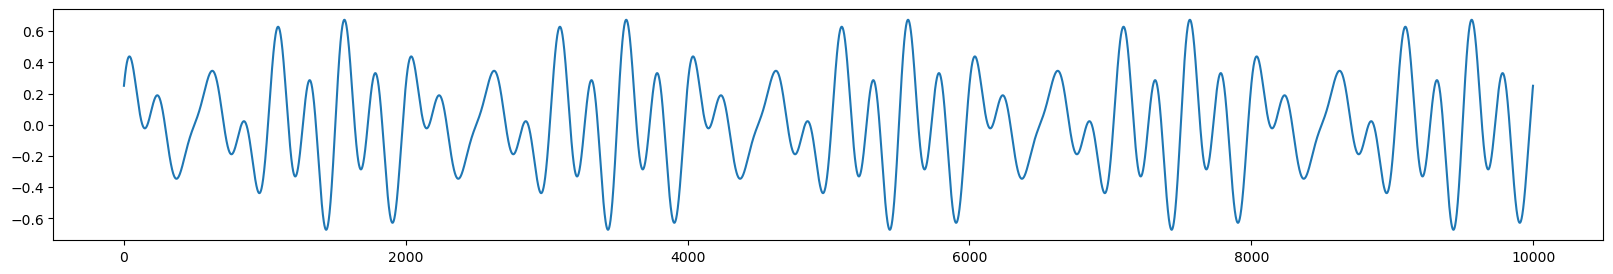

In [30]:
time_axis = np.linspace(0,2,10000)
signal_data = 0
signal_data += (np.sin(20*np.pi*time_axis) + np.sin(40*np.pi*time_axis) + np.cos(45 * np.pi * time_axis))/4   # generating a random signal.


widths = np.arange(1,1000)  # this is similar to range
plt.figure(figsize=(20,3))
plt.plot(signal_data)

In [31]:
# Now doing continous wavelet transform

coeffs= cwt(signal_data, ricker , widths)
coeffs.shape

(999, 10000)

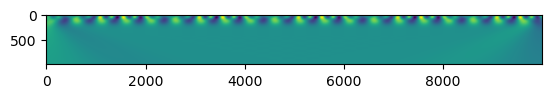

In [32]:
plt.imshow(coeffs)

---
### **Power Spectrum** of a time series => X(t)

- Ref: [video](https://youtu.be/WMOrCBxxgvA?si=Vw1mkGL3Kpjz0GTl)
- i cam accros this term while exploring about spectral flux of a function.
